In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
def compare_2_ver(a, b, keys, thres=1e-6):
    for k in keys:
        if isinstance(a[k], list):
            if k == 'spatial_latent':
                assert len(a[k]) == len(b[k])
                for i in range(len(a[k])):
                    assert a[k][i].shape == b[k][i].shape
                    print("#"*70)
                    print("Rmv code : ", a[k][i])
                    print("Add code : ", b[k][i])
                    print("#"*70)
                    print("Diff : ", a[k][i] - b[k][i])
                    diff_flag = np.all(np.abs(a[k][i].detach().cpu().numpy() - b[k][i].detach().cpu().numpy()) < thres)
                    print(f"===> Isclose : {k, i} => {diff_flag}")
                    print("#"*150)
        else:
            assert a[k].shape == b[k].shape
            print(f"[#] Key : {k} => {a[k].shape}, {b[k].shape}")
            if k == 'cond_img':
                for c in np.arange(0, a[k].shape[1], 3):
                    print(f"===> Isclose : {k} => {np.all(np.abs(a[k][:, c:c+3, ...] - b[k][:, c:c+3, ...]) < thres)}")
            else:
                print(f"===> Isclose : {k} => {np.all(np.abs(a[k] - b[k]) < thres)}")

In [105]:
rmv_code2 = np.load('./rmv_code2.npy', allow_pickle=True).item()
add_code2 = np.load('./add_code2.npy', allow_pickle=True).item()
compare_2_ver(rmv_code2, add_code2, keys=['cond_img', 'cond_params', 'spatial_latent'])

[#] Key : cond_img => (1, 6, 128, 128), (1, 6, 128, 128)
===> Isclose : cond_img => True
===> Isclose : cond_img => True
[#] Key : cond_params => (1, 671), (1, 671)
===> Isclose : cond_params => True
######################################################################
Rmv code :  tensor([[[[-0.4466, -0.5178, -0.5188,  ..., -0.5196, -0.5185, -0.4750],
          [-0.4581, -0.4973, -0.4972,  ..., -0.4971, -0.4984, -0.4371],
          [-0.4580, -0.4984, -0.4981,  ..., -0.4980, -0.4975, -0.4361],
          ...,
          [-0.3797, -0.3895, -0.4322,  ..., -0.4010, -0.4135, -0.4050],
          [-0.4009, -0.4350, -0.4475,  ..., -0.4106, -0.3647, -0.3753],
          [-0.3868, -0.4171, -0.4421,  ..., -0.5271, -0.4840, -0.3913]],

         [[ 0.4571,  0.4073,  0.4085,  ...,  0.4069,  0.4076,  0.3768],
          [ 0.4310,  0.3709,  0.3729,  ...,  0.3736,  0.3752,  0.3725],
          [ 0.4306,  0.3725,  0.3716,  ...,  0.3732,  0.3755,  0.3724],
          ...,
          [ 0.2670,  0.2393,  0.1623,

In [106]:
rmv_code2 = np.load('./rmv_code2.npy', allow_pickle=True).item()
rmv_code = np.load('./rmv_code.npy', allow_pickle=True).item()
compare_2_ver(rmv_code, rmv_code2, keys=['cond_img', 'cond_params'], thres=1e-6)



[#] Key : cond_img => (1, 6, 128, 128), (1, 6, 128, 128)
===> Isclose : cond_img => True
===> Isclose : cond_img => True
[#] Key : cond_params => (1, 671), (1, 671)
===> Isclose : cond_params => True


In [107]:
add_code2 = np.load('./add_code2.npy', allow_pickle=True).item()
add_code = np.load('./add_code.npy', allow_pickle=True).item()
compare_2_ver(add_code, add_code2, keys=['cond_img', 'cond_params'])



[#] Key : cond_img => (1, 6, 128, 128), (1, 6, 128, 128)
===> Isclose : cond_img => True
===> Isclose : cond_img => True
[#] Key : cond_params => (1, 671), (1, 671)
===> Isclose : cond_params => True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


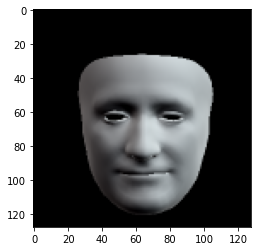

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


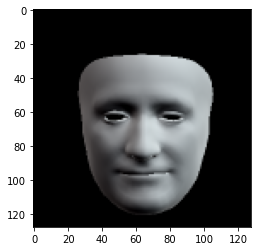

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


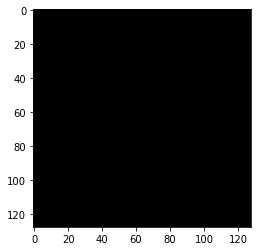

In [44]:
loaded_rendered = rmv_code['cond_img'][:, 0:3, ...][0].transpose((1, 2, 0))
plt.imshow(loaded_rendered)
plt.show()

deca_rendered = add_code['cond_img'][:, 0:3, ...][0].transpose((1, 2, 0))
plt.imshow(deca_rendered)
plt.show()

plt.imshow(loaded_rendered - deca_rendered)
plt.show()